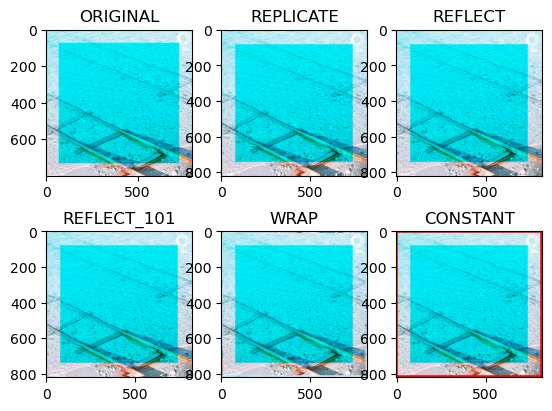

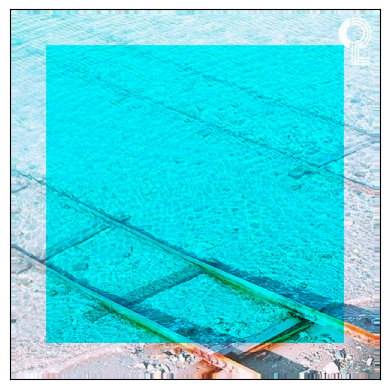

(800, 800, 3)
1920000
uint8


In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img = cv2.imread('ocean.jpg' )
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img[70:-70,70:-70,0]=0
replicate = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)


plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.show()
plt.imshow(replicate)
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()
print(img.shape)
print(img.size)
print(img.dtype)

In [1]:
import cv2

img1 = cv2.imread('fox.jpg')
img2 = cv2.imread('OpenCV.jpg')
dst = cv2.addWeighted(img1,0.7,img2,0.3,0) #투명도
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [13]:
# Load two images
img1 = cv2.imread('fox.jpg')
img2 = cv2.imread('OpenCV.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 0, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

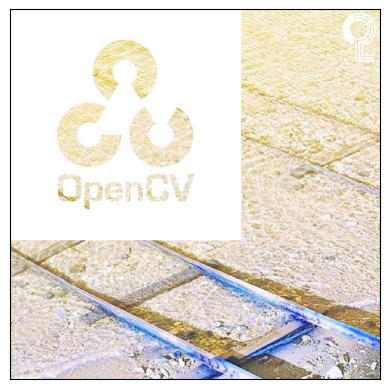

In [57]:
from matplotlib import pyplot as plt
# Load two images
img1 = cv2.imread('ocean.jpg')
img2 = cv2.imread('OpenCV.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 202, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1,cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()